# Notebook for IART project 2

## Data Importing

In [2]:
print('hello world')

hello world


In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [9]:
%matplotlib inline

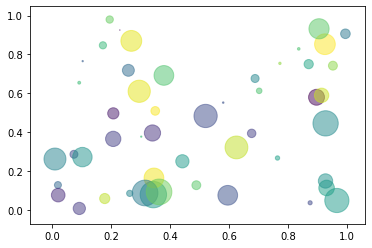

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

plt.scatter(x,y,area,c=colors, alpha=0.5)
plt.show()

In [13]:
import pandas as pd

test = pd.read_csv('Data/covid_19_clean_complete.csv')

print(test)

      Province/State         Country/Region        Lat       Long     Date  \
0                NaN            Afghanistan  33.000000  65.000000  1/22/20   
1                NaN                Albania  41.153300  20.168300  1/22/20   
2                NaN                Algeria  28.033900   1.659600  1/22/20   
3                NaN                Andorra  42.506300   1.521800  1/22/20   
4                NaN                 Angola -11.202700  17.873900  1/22/20   
...              ...                    ...        ...        ...      ...   
27979            NaN         Western Sahara  24.215500 -12.885800   5/6/20   
27980            NaN  Sao Tome and Principe   0.186360   6.613081   5/6/20   
27981            NaN                  Yemen  15.552727  48.516388   5/6/20   
27982            NaN                Comoros -11.645500  43.333300   5/6/20   
27983            NaN             Tajikistan  38.861034  71.276093   5/6/20   

       Confirmed  Deaths  Recovered  
0              0       0 